## Credit Card Fraud Detection

In this project you will predict fraudulent credit card transactions with the help of Machine learning models. Please import the following libraries to get started.

In [1]:
# *********************************************************************************************************************
# * @Capstone Project: Credit Card Fraud Detection 
# *********************************************************************************************************************
# *
# * @author    : Poonam Yadav and Pragun Sahney
# * @version   : v0.1.1
# * @Date      : 21-Sep-2020
# 
# *********************************************************************************************************************b

In [129]:
# *********************************************************************************************************************
# * Suppress Warnings
# *********************************************************************************************************************
import warnings
warnings.filterwarnings('ignore')

In [130]:
# *********************************************************************************************************************
# * Import Libraries 
# *********************************************************************************************************************

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


# To Scale our data
from   sklearn.preprocessing     import scale
from   sklearn.preprocessing     import StandardScaler
# For model building 

from   sklearn.decomposition     import pca
from   sklearn                   import metrics 
from   sklearn.model_selection   import train_test_split , cross_val_score,cross_val_predict
from   sklearn.metrics           import precision_score , recall_score ,roc_auc_score
from   sklearn.metrics           import precision_recall_curve , confusion_matrix , accuracy_score
from   random                    import sample
from   numpy.random              import uniform
from   sklearn.linear_model      import Ridge
from   sklearn.linear_model      import Lasso
from   sklearn.model_selection   import GridSearchCV 
from   sklearn                   import linear_model
from   sklearn.metrics           import r2_score
from   math                      import isnan  
from   sklearn                   import metrics
from   sklearn                   import preprocessing
from   sklearn                   import model_selection
import statsmodels.api           as     sm
from   imblearn.under_sampling   import RandomUnderSampler
from   imblearn.over_sampling    import RandomOverSampler
from   imblearn.over_sampling    import SMOTE
from   imblearn.over_sampling    import BorderlineSMOTE
from   imblearn.pipeline         import Pipeline
from   sklearn.preprocessing     import PowerTransformer
from   sklearn.linear_model      import LogisticRegression
from   sklearn.neighbors         import KNeighborsClassifier
from   sklearn.tree              import DecisionTreeClassifier

from xgboost import XGBClassifier
from xgboost import XGBClassifier


# Display setting 
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)


## Exploratory data analysis

In [131]:
#from google.colab import drive
#drive.mount('/content/drive')

In [132]:
df = pd.read_csv(r'C:\Users\AJAY\Desktop\Data science\Capstone project\creditcard.csv')

In [133]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


Dataset Details:
The data set includes credit card transactions made by European cardholders over a period of two days in September 2013. Out of a total of 2,84,807 transactions, 492 were fraudulent. This data set is highly unbalanced, with the positive class (frauds) accounting for 0.172% of the total transactions. The data set has also been modified with Principal Component Analysis (PCA) to maintain confidentiality. Apart from ‘time’ and ‘amount’, all the other features (V1, V2, V3, up to V28) are the principal components obtained using PCA. The feature 'time' contains the seconds elapsed between the first transaction in the data set and the subsequent transactions. The feature 'amount' is the transaction amount. The feature 'class' represents class labelling, and it takes the value 1 in cases of fraud and 0 in others.

In [134]:
df.shape

(284807, 31)

In [135]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,1.768627e-15,9.170318e-16,-1.810658e-15,1.693438e-15,1.479045e-15,3.482336e-15,1.392007e-15,-7.528491e-16,4.328772e-16,9.049732e-16,5.085503e-16,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [136]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

Checking the dataset for null values 

In [137]:
total = df.isnull().sum().sort_values(ascending = False)
percent = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending = False)
pd.concat([total, percent], axis=1, keys=['Total', 'Percent']).transpose()

,Class,V14,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V15,Amount,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Time
Total,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Percent,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Observe the distribution of our classes

In [138]:
classes=df['Class'].value_counts()
normal_share=classes[0]/df['Class'].count()*100
fraud_share=classes[1]/df['Class'].count()*100

In [139]:
classes

0    284315
1       492
Name: Class, dtype: int64

In [140]:
normal_share

99.82725143693798

In [141]:
fraud_share

0.1727485630620034

In [142]:
#A bar plot for the number and percentage of fraudulent vs non-fraudulent transcations

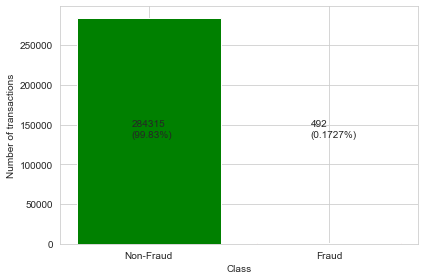

In [143]:
plt.bar(['Non-Fraud','Fraud'], df['Class'].value_counts(), color=['g','r'])
plt.xlabel('Class')
plt.ylabel('Number of transactions')
plt.annotate('{}\n({:.4}%)'.format(df['Class'].value_counts()[0], 
                                         df['Class'].value_counts()[0]/df['Class'].count()*100),
             (0.20, 0.45), xycoords='axes fraction')
plt.annotate('{}\n({:.4}%)'.format(df['Class'].value_counts()[1], 
                                         df['Class'].value_counts()[1]/df['Class'].count()*100),
             (0.70, 0.45), xycoords='axes fraction')
plt.tight_layout()
plt.show()

In [144]:
# Create a scatter plot to observe the distribution of classes with time and amount


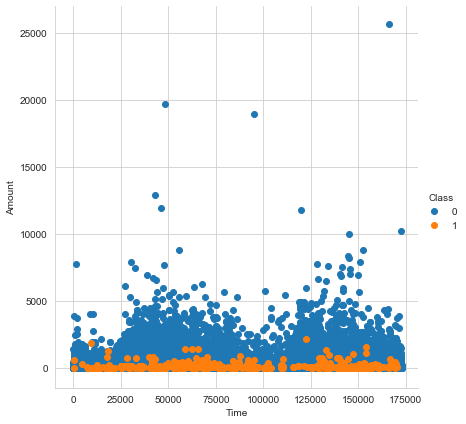

In [145]:
sns.set_style("whitegrid")
sns.FacetGrid(df, hue="Class", size = 6).map(plt.scatter, "Time", "Amount").add_legend()
plt.show()

In [146]:
# Create a scatter plot to observe the distribution of classes with Amount

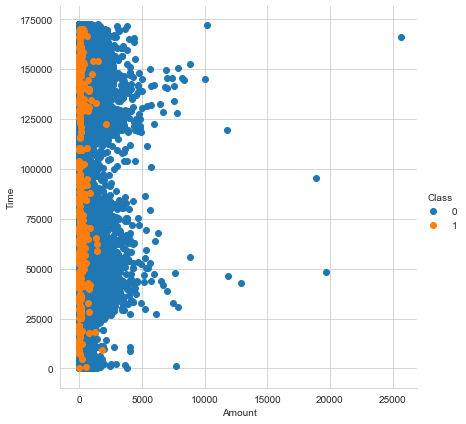

In [147]:
sns.set_style("whitegrid")
sns.FacetGrid(df, hue="Class", size = 6).map(plt.scatter, "Amount", "Time").add_legend()
plt.show()

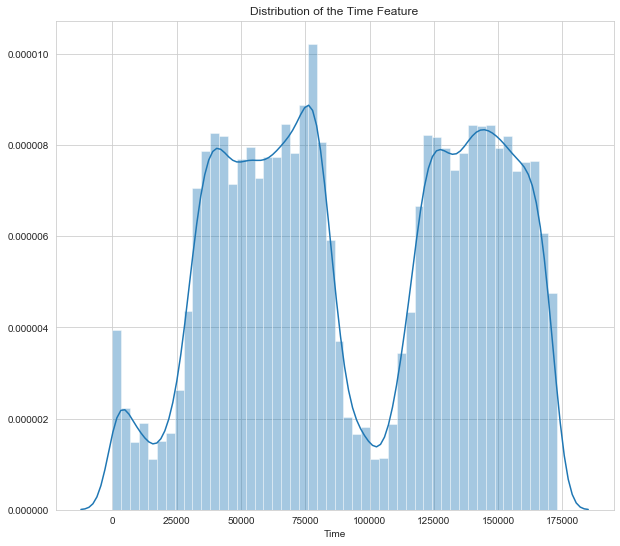

In [148]:
# visualising the time distribution
plt.figure(figsize=(10,9))
plt.title('Distribution of the Time Feature')
sns.distplot(df['Time'])

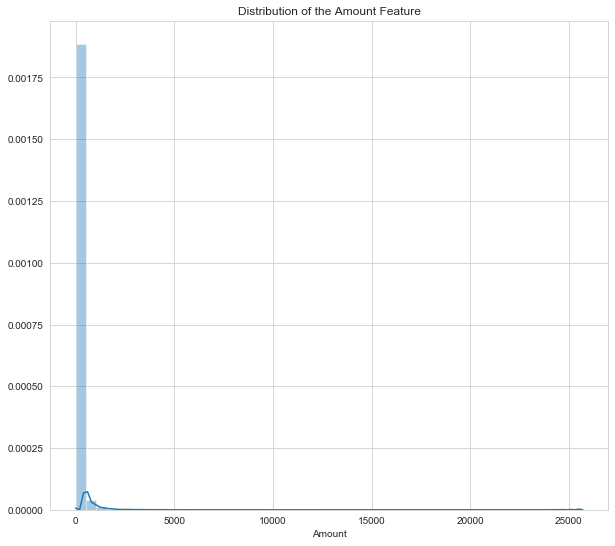

In [149]:
plt.figure(figsize=(10,9))
plt.title('Distribution of the Amount Feature')
sns.distplot(df['Amount'])

Text(0.5, 1, 'Heatmap of Correlation')

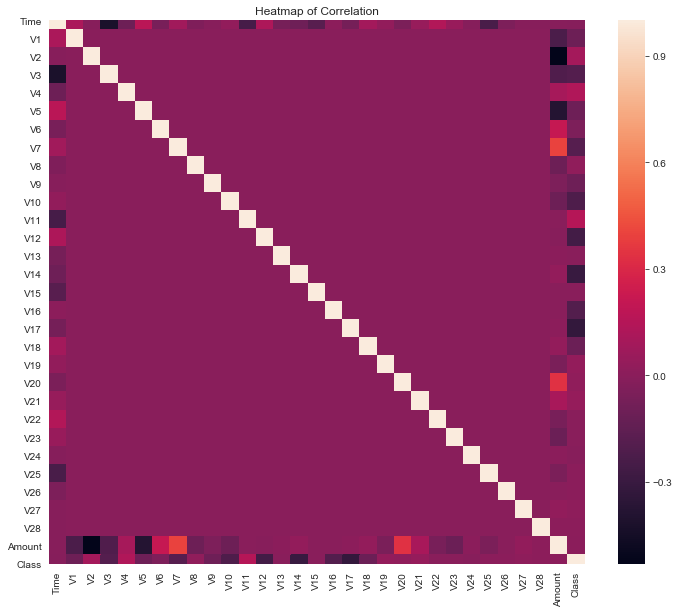

In [150]:
# heatmap of correlation between the predictor variables
corr = df.corr()
plt.figure(figsize=(12,10))
sns.heatmap(data=corr)
plt.title('Heatmap of Correlation')

In [151]:
# Drop unnecessary columns

In [152]:
df = df.drop(['Time'],axis=1)

In [153]:
# Normalize the amount column 

Normalization is a technique often applied as part of data preparation for machine learning. The goal of normalization is to change the values of numeric columns in the dataset to a common scale, without distorting differences in the ranges of values

In [154]:
df['NAmount'] = StandardScaler().fit_transform(df['Amount'].values.reshape(-1, 1))

In [155]:
df = df.drop(['Amount'],axis=1)

In [156]:
df.head(5)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class,NAmount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403


In [157]:

X = df.drop(['Class'], axis=1)
y = df['Class']

In [158]:
X.head(5)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,NAmount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403


In [159]:
y.head(5)

0    0
1    0
2    0
3    0
4    0
Name: Class, dtype: int64

### Plotting the distribution of a variable

### Splitting the data into train & test data

In [160]:
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.80 , test_size = 0.20 , random_state= 13000 , stratify = y)

In [161]:
# plot the histogram of a variable from the dataset to see the skewness

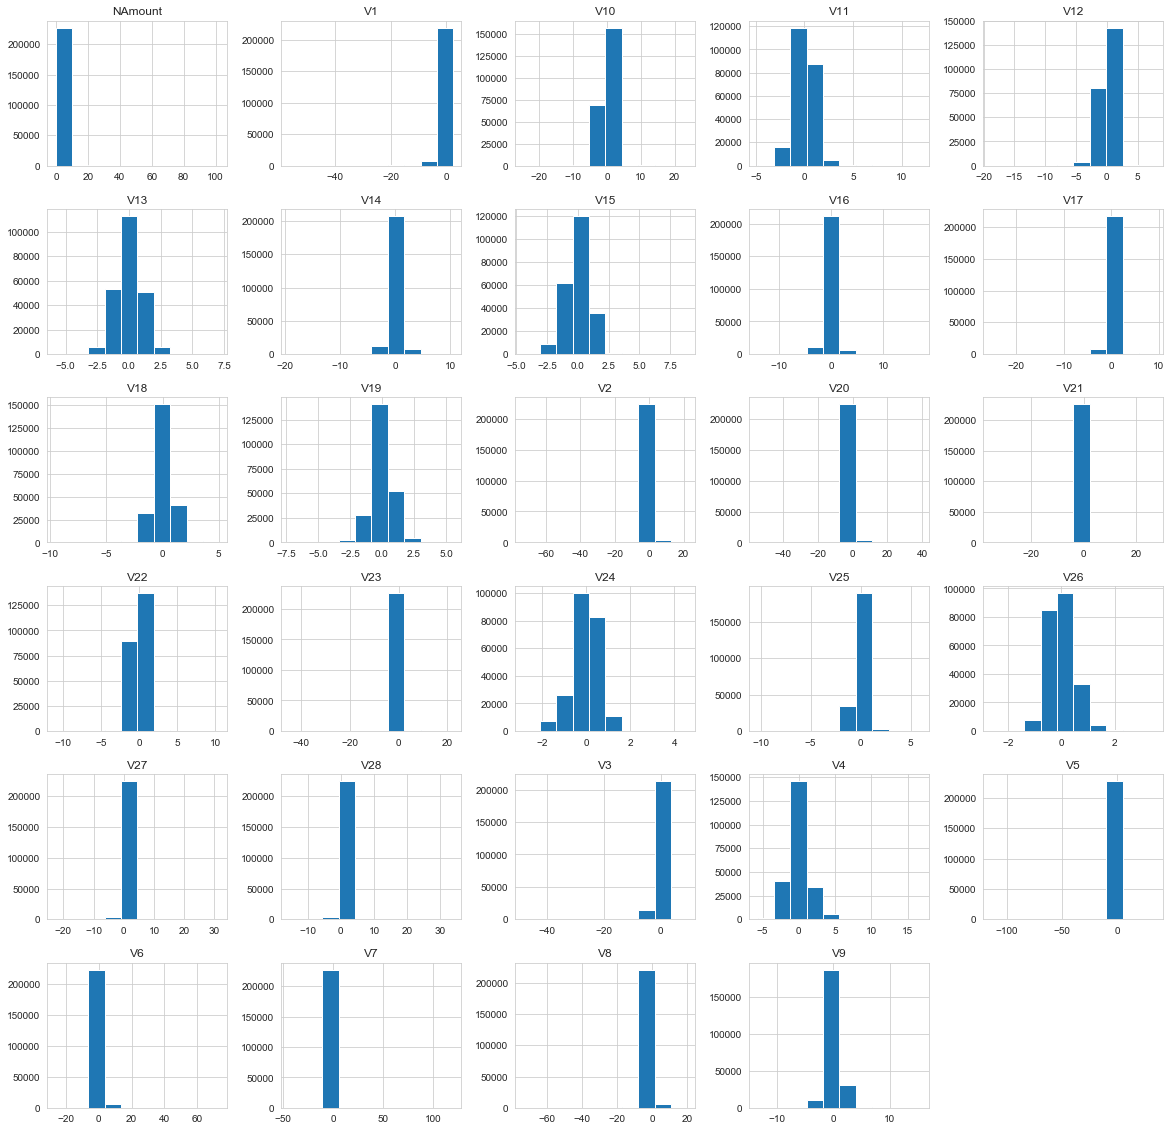

In [162]:
X_train.hist(figsize=(20,20))
plt.show()

### If there is skewness present in the distribution use:
- <b>Power Transformer</b> package present in the <b>preprocessing library provided by sklearn</b> to make distribution more gaussian

In [163]:
# - Apply : preprocessing.PowerTransformer(copy=False) to fit & transform the train & test data
pt = preprocessing.PowerTransformer(copy=False)
X_train = pt.fit_transform(X_train)
X_test=  pt.transform(X_test)


## Model Building
- Build different models on the imbalanced dataset and see the result

In [166]:
classifier= {
    'Logistic Regression':LogisticRegression(),
    'XGBoost': XGBClassifier(),
    'DecisionTree':DecisionTreeClassifier()
}


In [167]:
for key,values in classifier.items():
    values.fit(X_train,y_train)
    training_score= cross_val_score(values,X_train,y_train,cv=5)
    print('Training accuracy score of {} is {}'.format(key,round(training_score.mean()*100,2)))
    train_pred = cross_val_predict(values, X_train,y_train, cv=5)
    print('Roc_Auc training score for {} is {}: '.format(key, round(roc_auc_score(y_train,train_pred)*100,2)))
    test_score= cross_val_score(values,X_test,y_test,cv=5)
    print('Test accuracy score of {} is {}'.format(key,round(test_score.mean()*100,2)))
    test_pred = cross_val_predict(values, X_test,y_test, cv=5)
    print('Roc_Auc test score for {} is {}: '.format(key, round(roc_auc_score(y_test,test_pred)*100,2)))
    print('---'*30)


Training accuracy score of Logistic Regression is 99.92
Roc_Auc training score for Logistic Regression is 80.96: 
Test accuracy score of Logistic Regression is 99.93
Roc_Auc test score for Logistic Regression is 83.67: 
------------------------------------------------------------------------------------------
Training accuracy score of XGBoost is 99.95
Roc_Auc training score for XGBoost is 87.81: 
Test accuracy score of XGBoost is 99.96
Roc_Auc test score for XGBoost is 90.3: 
------------------------------------------------------------------------------------------
Training accuracy score of DecisionTree is 99.92
Roc_Auc training score for DecisionTree is 87.67: 
Test accuracy score of DecisionTree is 99.91
Roc_Auc test score for DecisionTree is 88.24: 
------------------------------------------------------------------------------------------


Hyper Parameter Tuning using GridSearchCv

In [168]:
from sklearn.model_selection import GridSearchCV

log_reg_params = {"penalty": ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
xgb_params = {"learning_rate": [0.001, 0.01, 0.05],"max_depth": [3,5],"gamma": [0,0.3,1],'n_estimators':list(range(50,200,50))}
tree_params = {"criterion": ["gini", "entropy"], "max_depth": list(range(2,4,1)), 
              "min_samples_leaf": list(range(5,7,1))}


classifier= {
    'Logistic Regression':LogisticRegression(),
    'XGBoost': XGBClassifier(),                                                                       
    'DecisionTree':DecisionTreeClassifier()
}

def grid_search(classifier,Param):
    grid_log_reg = GridSearchCV(classifier,param_grid=Param , n_jobs = 10,cv=10)
    grid_log_reg.fit(X_train, y_train)
    best_param = grid_log_reg.best_estimator_
    print('{} algorithm best parameter are : {}'.format(classifier.__class__.__name__,best_param))


In [169]:
grid_search(LogisticRegression(),log_reg_params)

LogisticRegression algorithm best parameter are : LogisticRegression(C=1)


In [170]:
log_reg= LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
log_reg.fit(X_train,y_train)

LogisticRegression(C=1)

In [171]:
y_predicted_log = log_reg.predict(X_test)

In [172]:
log_recall = recall_score(y_test, y_predicted_log)
log_cm = confusion_matrix(y_test, y_predicted_log)
log_auc = roc_auc_score(y_test, y_predicted_log)
log_accuracy = accuracy_score(y_test, y_predicted_log)
print("Accuracy: {:.4%}".format(log_accuracy))
print("Recall: {:.4%}".format(log_recall))
print("ROC AUC: {:.4%}".format(log_auc))

Accuracy: 99.9368%
Recall: 68.3673%
ROC AUC: 84.1793%


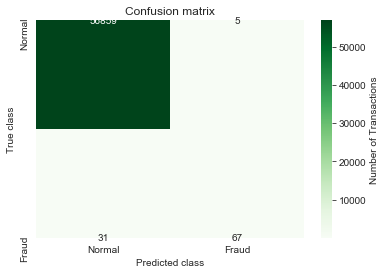

In [173]:
LABELS = ["Normal", "Fraud"]
sns.heatmap(log_cm, xticklabels=LABELS, yticklabels=LABELS, annot=True, cmap="Greens", fmt='g', cbar_kws={'label': 'Number of Transactions'});
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

In [174]:
xgb_mod = XGBClassifier(learning_rate=0.01,max_depth=5,gamma= 0.3,n_estimators=50)

In [175]:
Xtrain = np.asmatrix(X_train)
Xtest = np.asmatrix(X_test)
xgb_mod.fit(Xtrain,y_train)

XGBClassifier(gamma=0.3, learning_rate=0.01, max_depth=5, n_estimators=50)

In [176]:
y_predicted_xgb = xgb_mod.predict(Xtest)

In [177]:
xgb_recall = recall_score(y_test, y_predicted_xgb)
xgb_cm = confusion_matrix(y_test, y_predicted_xgb)
xgb_auc = roc_auc_score(y_test, y_predicted_xgb)
xgb_accuracy = accuracy_score(y_test, y_predicted_xgb)
print("Accuracy: {:.4%}".format(xgb_accuracy))
print("Recall: {:.4%}".format(xgb_recall))
print("ROC AUC: {:.4%}".format(xgb_auc))

Accuracy: 99.9614%
Recall: 81.6327%
ROC AUC: 90.8128%


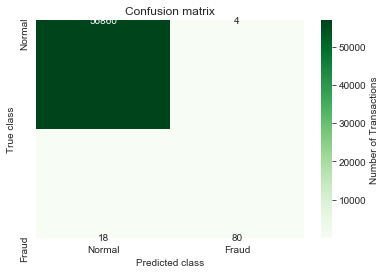

In [178]:
sns.heatmap(xgb_cm, xticklabels=LABELS, yticklabels=LABELS, annot=True, cmap="Greens", fmt='g', cbar_kws={'label': 'Number of Transactions'});
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

In [179]:
grid_search(DecisionTreeClassifier(),tree_params)

DecisionTreeClassifier algorithm best parameter are : DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=5)


In [180]:
Dec_tree= DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
Dec_tree.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=5)

In [181]:
y_predicted_dec = Dec_tree.predict(Xtest)

In [182]:
dec_recall = recall_score(y_test, y_predicted_dec)
dec_cm = confusion_matrix(y_test, y_predicted_dec)
dec_auc = roc_auc_score(y_test, y_predicted_dec)
dec_accuracy = accuracy_score(y_test, y_predicted_dec)
print("Accuracy: {:.4%}".format(dec_accuracy))
print("Recall: {:.4%}".format(dec_recall))
print("ROC AUC: {:.4%}".format(dec_auc))

Accuracy: 99.9456%
Recall: 79.5918%
ROC AUC: 89.7862%


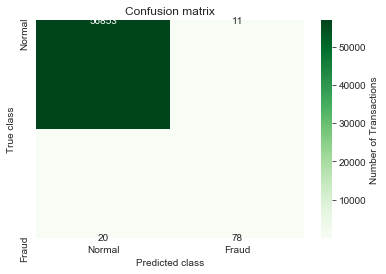

In [183]:
sns.heatmap(dec_cm, xticklabels=LABELS, yticklabels=LABELS, annot=True, cmap="Greens", fmt='g', cbar_kws={'label': 'Number of Transactions'});
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

### Random Oversampling

In [184]:
from imblearn import over_sampling #- import the packages
#Random Oversampling 
oversamp = RandomOverSampler(random_state=42)
X_ros , y_ros  = oversamp.fit_resample(X_train, y_train)
X1_train, X1_test, y1_train, y1_test = train_test_split(X_ros,y_ros, train_size=0.80 , test_size = 0.20 , random_state= 13000 )

In [185]:
for key,values in classifier.items():
    values.fit(X1_train,y1_train)
    training_score= cross_val_score(values,X1_train,y1_train,cv=5)
    print('Training accuracy score of {} is {}'.format(key,round(training_score.mean()*100,2)))
    train_pred = cross_val_predict(values, X1_train,y1_train, cv=5)
    print('Roc_Auc training score for {} is {} '.format(key, round(roc_auc_score(y1_train,train_pred)*100,2)))
    test_score= cross_val_score(values,X1_test,y1_test,cv=5)
    print('Test accuracy score of {} is {}'.format(key,round(test_score.mean()*100,2)))
    test_pred = cross_val_predict(values, X1_test,y1_test, cv=5)
    print('Roc_Auc test score for {} is {} '.format(key, round(roc_auc_score(y1_test,test_pred)*100,2)))
    print('---'*30)


Training accuracy score of Logistic Regression is 94.74
Roc_Auc training score for Logistic Regression is 94.74 
Test accuracy score of Logistic Regression is 94.74
Roc_Auc test score for Logistic Regression is 94.75 
------------------------------------------------------------------------------------------
Training accuracy score of XGBoost is 99.65
Roc_Auc training score for XGBoost is 99.65 
Test accuracy score of XGBoost is 99.55
Roc_Auc test score for XGBoost is 99.55 
------------------------------------------------------------------------------------------
Training accuracy score of DecisionTree is 99.96
Roc_Auc training score for DecisionTree is 99.97 
Test accuracy score of DecisionTree is 99.9
Roc_Auc test score for DecisionTree is 99.89 
------------------------------------------------------------------------------------------


Hyper Parameter Tuning using GridSearchCv

In [186]:
from sklearn.model_selection import GridSearchCV

log_reg_params = {"penalty": ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
xgb_params = {"learning_rate": [0.001, 0.01, 0.05],"max_depth": [3,5],"gamma": [0,0.3,1],'n_estimators':list(range(50,200,50))}
tree_params = {"criterion": ["gini", "entropy"], "max_depth": list(range(2,4,1)), 
              "min_samples_leaf": list(range(5,7,1))}


classifier= {
    'Logistic Regression':LogisticRegression(),
    'XGBoost': XGBClassifier(),                                                                       
    'DecisionTree':DecisionTreeClassifier()
}

def grid_search(classifier,Param):
    grid_log_reg = GridSearchCV(classifier,param_grid=Param , n_jobs = 10,cv=10)
    grid_log_reg.fit(X1_train, y1_train)
    best_param = grid_log_reg.best_estimator_
    print('{} algorithm best parameter are : {}'.format(classifier.__class__.__name__,best_param))


In [187]:
grid_search(LogisticRegression(),log_reg_params)

LogisticRegression algorithm best parameter are : LogisticRegression(C=0.001)


In [188]:
log_reg_ros= LogisticRegression(C=0.001, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
log_reg_ros.fit(X1_train,y1_train)

LogisticRegression(C=0.001)

In [189]:
y_predicted_log_ros = log_reg_ros.predict(X1_test)

In [190]:
log_recall_ros = recall_score(y1_test, y_predicted_log_ros)
log_cm_ros = confusion_matrix(y1_test, y_predicted_log_ros)
log_auc_ros = roc_auc_score(y1_test, y_predicted_log_ros)
log_accuracy_ros = accuracy_score(y1_test, y_predicted_log_ros)
print("Accuracy: {:.4%}".format(log_accuracy_ros))
print("Recall: {:.4%}".format(log_recall_ros))
print("ROC AUC: {:.4%}".format(log_auc_ros))

Accuracy: 94.7187%
Recall: 91.9034%
ROC AUC: 94.7224%


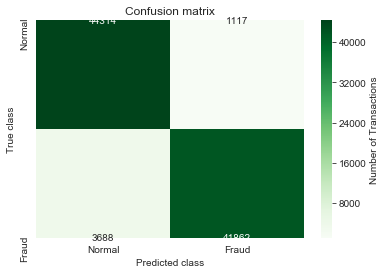

In [191]:
LABELS = ["Normal", "Fraud"]
sns.heatmap(log_cm_ros, xticklabels=LABELS, yticklabels=LABELS, annot=True, cmap="Greens", fmt='g', cbar_kws={'label': 'Number of Transactions'});
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

In [192]:
xgb_mod_ros = XGBClassifier(learning_rate=0.01,max_depth=5,gamma= 0.3,n_estimators=50)

In [193]:
Xtrain = np.asmatrix(X1_train)
Xtest = np.asmatrix(X1_test)
xgb_mod_ros.fit(Xtrain,y1_train)

XGBClassifier(gamma=0.3, learning_rate=0.01, max_depth=5, n_estimators=50)

In [194]:
y_predicted_xgb_ros = xgb_mod_ros.predict(Xtest)

In [195]:
xgb_recall_ros = recall_score(y1_test, y_predicted_xgb_ros)
xgb_cm_ros = confusion_matrix(y1_test, y_predicted_xgb_ros)
xgb_auc_ros = roc_auc_score(y1_test, y_predicted_xgb_ros)
xgb_accuracy_ros = accuracy_score(y1_test, y_predicted_xgb_ros)
print("Accuracy: {:.4%}".format(xgb_accuracy_ros))
print("Recall: {:.4%}".format(xgb_recall_ros))
print("ROC AUC: {:.4%}".format(xgb_auc_ros))

Accuracy: 96.7938%
Recall: 95.2250%
ROC AUC: 96.7959%


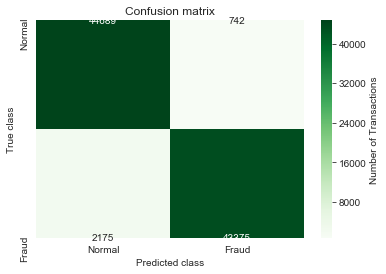

In [196]:
sns.heatmap(xgb_cm_ros, xticklabels=LABELS, yticklabels=LABELS, annot=True, cmap="Greens", fmt='g', cbar_kws={'label': 'Number of Transactions'});
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

In [197]:
grid_search(DecisionTreeClassifier(),tree_params)

DecisionTreeClassifier algorithm best parameter are : DecisionTreeClassifier(max_depth=3, min_samples_leaf=5)


In [198]:
Dec_tree= DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
Dec_tree.fit(Xtrain,y1_train)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=5)

In [199]:
y_predicted_dec_ros = Dec_tree.predict(Xtest)

In [200]:
dec_recall_ros = recall_score(y1_test, y_predicted_dec_ros)
dec_cm_ros = confusion_matrix(y1_test, y_predicted_dec_ros)
dec_auc_ros = roc_auc_score(y1_test, y_predicted_dec_ros)
dec_accuracy_ros = accuracy_score(y1_test, y_predicted_dec_ros)
print("Accuracy: {:.4%}".format(dec_accuracy_ros))
print("Recall: {:.4%}".format(dec_recall_ros))
print("ROC AUC: {:.4%}".format(dec_auc_ros))

Accuracy: 93.9965%
Recall: 92.4413%
ROC AUC: 93.9986%


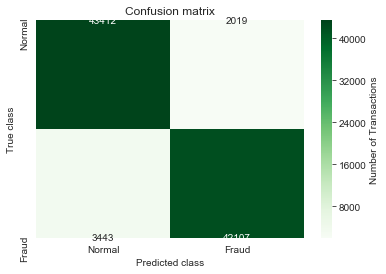

In [201]:
sns.heatmap(dec_cm_ros, xticklabels=LABELS, yticklabels=LABELS, annot=True, cmap="Greens", fmt='g', cbar_kws={'label': 'Number of Transactions'});
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

### SMOTE

In [202]:
# SMOTE
smote = SMOTE(random_state=42)
X_smote , y_smote = smote.fit_resample(X_train, y_train)
X2_train, X2_test, y2_train, y2_test = train_test_split(X_smote,y_smote, train_size=0.80 , test_size = 0.20 , random_state= 13000 )

In [203]:
for key,values in classifier.items():
    values.fit(X2_train,y2_train)
    training_score= cross_val_score(values,X2_train,y2_train,cv=5)
    print('Training accuracy score of {} is {}'.format(key,round(training_score.mean()*100,2)))
    train_pred = cross_val_predict(values, X2_train,y2_train, cv=5)
    print('Roc_Auc training score for {} is {} '.format(key, round(roc_auc_score(y2_train,train_pred)*100,2)))
    test_score= cross_val_score(values,X2_test,y2_test,cv=5)
    print('Test accuracy score of {} is {}'.format(key,round(test_score.mean()*100,2)))
    test_pred = cross_val_predict(values, X2_test,y2_test, cv=5)
    print('Roc_Auc test score for {} is {} '.format(key, round(roc_auc_score(y2_test,test_pred)*100,2)))
    print('---'*30)


Training accuracy score of Logistic Regression is 94.49
Roc_Auc training score for Logistic Regression is 94.49 
Test accuracy score of Logistic Regression is 94.37
Roc_Auc test score for Logistic Regression is 94.38 
------------------------------------------------------------------------------------------
Training accuracy score of XGBoost is 98.15
Roc_Auc training score for XGBoost is 98.15 
Test accuracy score of XGBoost is 98.11
Roc_Auc test score for XGBoost is 98.11 
------------------------------------------------------------------------------------------
Training accuracy score of DecisionTree is 99.78
Roc_Auc training score for DecisionTree is 99.78 
Test accuracy score of DecisionTree is 99.3
Roc_Auc test score for DecisionTree is 99.3 
------------------------------------------------------------------------------------------


Hyper Parameter Tuning using GridSearchCv

In [204]:
from sklearn.model_selection import GridSearchCV

log_reg_params = {"penalty": ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
xgb_params = {"learning_rate": [0.001, 0.01, 0.05],"max_depth": [3,5],"gamma": [0,0.3,1],'n_estimators':list(range(50,200,50))}
tree_params = {"criterion": ["gini", "entropy"], "max_depth": list(range(2,4,1)), 
              "min_samples_leaf": list(range(5,7,1))}


classifier= {
    'Logistic Regression':LogisticRegression(),
    'XGBoost': XGBClassifier(),                                                                       
    'DecisionTree':DecisionTreeClassifier()
}

def grid_search(classifier,Param):
    grid_log_reg = GridSearchCV(classifier,param_grid=Param , n_jobs = 10,cv=10)
    grid_log_reg.fit(X2_train, y2_train)
    best_param = grid_log_reg.best_estimator_
    print('{} algorithm best parameter are : {}'.format(classifier.__class__.__name__,best_param))


In [205]:
grid_search(LogisticRegression(),log_reg_params)

LogisticRegression algorithm best parameter are : LogisticRegression(C=1)


In [206]:
log_reg_smote= LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
log_reg_smote.fit(X2_train,y2_train)

LogisticRegression(C=1)

In [207]:
y_predicted_log_smote = log_reg_smote.predict(X2_test)

In [208]:
log_recall_smote = recall_score(y2_test, y_predicted_log_smote)
log_cm_smote = confusion_matrix(y2_test, y_predicted_log_smote)
log_auc_smote = roc_auc_score(y2_test, y_predicted_log_smote)
log_accuracy_smote = accuracy_score(y2_test, y_predicted_log_smote)
print("Accuracy: {:.4%}".format(log_accuracy_smote))
print("Recall: {:.4%}".format(log_recall_smote))
print("ROC AUC: {:.4%}".format(log_auc_smote))

Accuracy: 94.3790%
Recall: 91.9012%
ROC AUC: 94.3823%


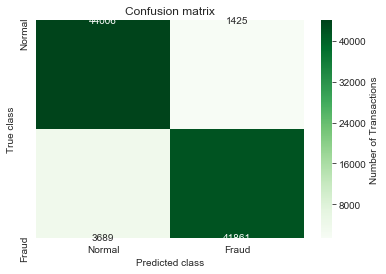

In [209]:
LABELS = ["Normal", "Fraud"]
sns.heatmap(log_cm_smote, xticklabels=LABELS, yticklabels=LABELS, annot=True, cmap="Greens", fmt='g', cbar_kws={'label': 'Number of Transactions'});
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

In [210]:
xgb_mod_smote = XGBClassifier(learning_rate=0.01,max_depth=5,gamma= 0.3,n_estimators=50)

In [211]:
Xtrain = np.asmatrix(X2_train)
Xtest = np.asmatrix(X2_test)
xgb_mod_smote.fit(Xtrain,y2_train)

XGBClassifier(gamma=0.3, learning_rate=0.01, max_depth=5, n_estimators=50)

In [212]:
y_predicted_xgb_smote = xgb_mod_ros.predict(Xtest)

In [213]:
xgb_recall_smote = recall_score(y2_test, y_predicted_xgb_smote)
xgb_cm_smote = confusion_matrix(y2_test, y_predicted_xgb_smote)
xgb_auc_smote = roc_auc_score(y2_test, y_predicted_xgb_smote)
xgb_accuracy_smote = accuracy_score(y2_test, y_predicted_xgb_smote)
print("Accuracy: {:.4%}".format(xgb_accuracy_smote))
print("Recall: {:.4%}".format(xgb_recall_smote))
print("ROC AUC: {:.4%}".format(xgb_auc_smote))

Accuracy: 95.0077%
Recall: 91.6575%
ROC AUC: 95.0121%


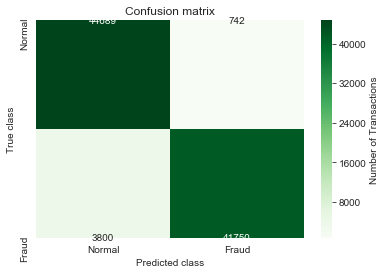

In [214]:
sns.heatmap(xgb_cm_smote, xticklabels=LABELS, yticklabels=LABELS, annot=True, cmap="Greens", fmt='g', cbar_kws={'label': 'Number of Transactions'});
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

In [215]:
grid_search(DecisionTreeClassifier(),tree_params)

DecisionTreeClassifier algorithm best parameter are : DecisionTreeClassifier(max_depth=3, min_samples_leaf=6)


In [216]:
Dec_tree= DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
Dec_tree.fit(Xtrain,y2_train)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=5)

In [217]:
y_predicted_dec_smote = Dec_tree.predict(Xtest)

In [218]:
dec_recall_smote = recall_score(y2_test, y_predicted_dec_smote)
dec_cm_smote = confusion_matrix(y2_test, y_predicted_dec_smote)
dec_auc_smote = roc_auc_score(y2_test, y_predicted_dec_smote)
dec_accuracy_smote = accuracy_score(y2_test, y_predicted_dec_smote)
print("Accuracy: {:.4%}".format(dec_accuracy_smote))
print("Recall: {:.4%}".format(dec_recall_smote))
print("ROC AUC: {:.4%}".format(dec_auc_smote))

Accuracy: 93.2876%
Recall: 91.4248%
ROC AUC: 93.2900%


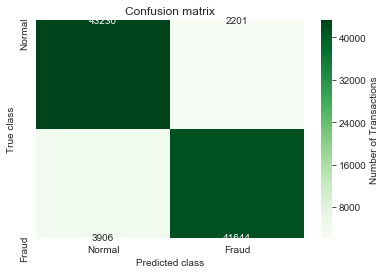

In [219]:
sns.heatmap(dec_cm_smote, xticklabels=LABELS, yticklabels=LABELS, annot=True, cmap="Greens", fmt='g', cbar_kws={'label': 'Number of Transactions'});
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

### ADASYN

In [220]:
#ADASYN
ada = over_sampling.ADASYN(random_state=0)
X_adasyn, y_adasyn = ada.fit_resample(X_train, y_train)
X3_train, X3_test, y3_train, y3_test = train_test_split(X_adasyn,y_adasyn, train_size=0.80 , test_size = 0.20 , random_state= 13000 )

In [221]:
for key,values in classifier.items():
    values.fit(X3_train,y3_train)
    training_score= cross_val_score(values,X3_train,y3_train,cv=5)
    print('Training accuracy score of {} is {}'.format(key,round(training_score.mean()*100,2)))
    train_pred = cross_val_predict(values, X3_train,y3_train, cv=5)
    print('Roc_Auc training score for {} is {} '.format(key, round(roc_auc_score(y3_train,train_pred)*100,2)))
    test_score= cross_val_score(values,X3_test,y3_test,cv=5)
    print('Test accuracy score of {} is {}'.format(key,round(test_score.mean()*100,2)))
    test_pred = cross_val_predict(values, X3_test,y3_test, cv=5)
    print('Roc_Auc test score for {} is {} '.format(key, round(roc_auc_score(y3_test,test_pred)*100,2)))
    print('---'*30)


Training accuracy score of Logistic Regression is 89.17
Roc_Auc training score for Logistic Regression is 89.17 
Test accuracy score of Logistic Regression is 89.0
Roc_Auc test score for Logistic Regression is 89.0 
------------------------------------------------------------------------------------------
Training accuracy score of XGBoost is 97.57
Roc_Auc training score for XGBoost is 97.57 
Test accuracy score of XGBoost is 97.45
Roc_Auc test score for XGBoost is 97.45 
------------------------------------------------------------------------------------------
Training accuracy score of DecisionTree is 99.83
Roc_Auc training score for DecisionTree is 99.83 
Test accuracy score of DecisionTree is 99.41
Roc_Auc test score for DecisionTree is 99.42 
------------------------------------------------------------------------------------------


Hyper Parameter Tuning using GridSearchCv

In [222]:
from sklearn.model_selection import GridSearchCV

log_reg_params = {"penalty": ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
xgb_params = {"learning_rate": [0.001, 0.01, 0.05],"max_depth": [3,5],"gamma": [0,0.3,1],'n_estimators':list(range(50,200,50))}
tree_params = {"criterion": ["gini", "entropy"], "max_depth": list(range(2,4,1)), 
              "min_samples_leaf": list(range(5,7,1))}


classifier= {
    'Logistic Regression':LogisticRegression(),
    'XGBoost': XGBClassifier(),                                                                       
    'DecisionTree':DecisionTreeClassifier()
}

def grid_search(classifier,Param):
    grid_log_reg = GridSearchCV(classifier,param_grid=Param , n_jobs = 10,cv=10)
    grid_log_reg.fit(X3_train, y3_train)
    best_param = grid_log_reg.best_estimator_
    print('{} algorithm best parameter are : {}'.format(classifier.__class__.__name__,best_param))


In [223]:
grid_search(LogisticRegression(),log_reg_params)

LogisticRegression algorithm best parameter are : LogisticRegression(C=10)


In [224]:
log_reg_ada= LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
log_reg_ada.fit(X3_train,y3_train)

LogisticRegression(C=10)

In [225]:
y_predicted_log_ada = log_reg_ada.predict(X3_test)

In [226]:
log_recall_ada = recall_score(y3_test, y_predicted_log_ada)
log_cm_ada = confusion_matrix(y3_test, y_predicted_log_ada)
log_auc_ada = roc_auc_score(y3_test, y_predicted_log_ada)
log_accuracy_ada = accuracy_score(y3_test, y_predicted_log_ada)
print("Accuracy: {:.4%}".format(log_accuracy_ada))
print("Recall: {:.4%}".format(log_recall_ada))
print("ROC AUC: {:.4%}".format(log_auc_ada))

Accuracy: 89.1254%
Recall: 87.2887%
ROC AUC: 89.1275%


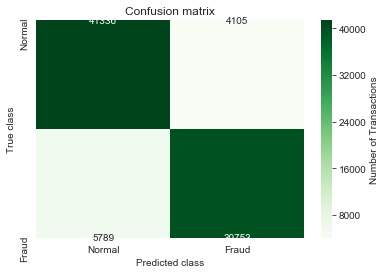

In [227]:
LABELS = ["Normal", "Fraud"]
sns.heatmap(log_cm_ada, xticklabels=LABELS, yticklabels=LABELS, annot=True, cmap="Greens", fmt='g', cbar_kws={'label': 'Number of Transactions'});
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

In [228]:
xgb_mod_ada = XGBClassifier(learning_rate=0.01,max_depth=5,gamma= 0.3,n_estimators=50)

In [229]:
Xtrain = np.asmatrix(X3_train)
Xtest = np.asmatrix(X3_test)
xgb_mod_smote.fit(Xtrain,y3_train)

XGBClassifier(gamma=0.3, learning_rate=0.01, max_depth=5, n_estimators=50)

In [230]:
y_predicted_xgb_ada = xgb_mod_ros.predict(Xtest)

In [231]:
xgb_recall_ada = recall_score(y3_test, y_predicted_xgb_ada)
xgb_cm_ada = confusion_matrix(y3_test, y_predicted_xgb_ada)
xgb_auc_ada = roc_auc_score(y3_test, y_predicted_xgb_ada)
xgb_accuracy_ada = accuracy_score(y3_test, y_predicted_xgb_ada)
print("Accuracy: {:.4%}".format(xgb_accuracy_ada))
print("Recall: {:.4%}".format(xgb_recall_ada))
print("ROC AUC: {:.4%}".format(xgb_auc_ada))

Accuracy: 84.4213%
Recall: 70.5151%
ROC AUC: 84.4367%


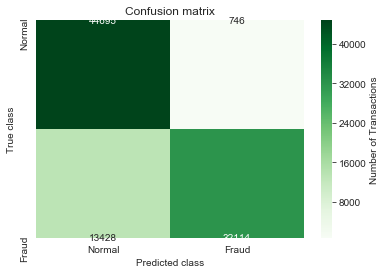

In [232]:
sns.heatmap(xgb_cm_ada, xticklabels=LABELS, yticklabels=LABELS, annot=True, cmap="Greens", fmt='g', cbar_kws={'label': 'Number of Transactions'});
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

In [233]:
grid_search(DecisionTreeClassifier(),tree_params)

DecisionTreeClassifier algorithm best parameter are : DecisionTreeClassifier(max_depth=3, min_samples_leaf=5)


In [234]:
Dec_tree_ada= DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
Dec_tree_ada.fit(Xtrain,y3_train)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=5)

In [235]:
y_predicted_dec_ada = Dec_tree_ada.predict(Xtest)

In [236]:
dec_recall_ada = recall_score(y3_test, y_predicted_dec_ada)
dec_cm_ada = confusion_matrix(y3_test, y_predicted_dec_ada)
dec_auc_ada = roc_auc_score(y3_test, y_predicted_dec_ada)
dec_accuracy_ada = accuracy_score(y3_test, y_predicted_dec_ada)
print("Accuracy: {:.4%}".format(dec_accuracy_ada))
print("Recall: {:.4%}".format(dec_recall_ada))
print("ROC AUC: {:.4%}".format(dec_auc_ada))

Accuracy: 86.7810%
Recall: 87.1635%
ROC AUC: 86.7806%


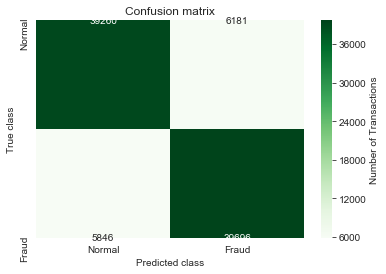

In [237]:
sns.heatmap(dec_cm_ada, xticklabels=LABELS, yticklabels=LABELS, annot=True, cmap="Greens", fmt='g', cbar_kws={'label': 'Number of Transactions'});
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()